# <font face="Verdana" size=6 color='#6495ED'>  THIS IS ME

<font face="Verdana" size=3 color='#40E0D0'> Profs. Larissa Driemeier, Thiago Martins

<center><img src='https://drive.google.com/uc?export=view&id=1LYiTAE2KG5dJf_qIoVKOluUhzrK-AmfP' width="600"></center>

Na próximas duas aulas, vocês irão construir um programa para reconhecimento facial de qualquer colega seu do curso de IA. Para isso, serão 3 etapas:
1. Geração de Eigenfaces - utilização do banco de dados *Labeled Faces in the Wild* (LFW) em conjunto com as fotos de seus colegas, para extrair as características principais de uma face humana via PCA;
2. Criação um classificador SVM para reconhecimento facial de seus colegas;
3. Utilização do classificador em tempo real na competição em sala.

Prontos? Esta é a __primeira__ etapa.

In [1]:
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import matplotlib.pyplot as plt
import html
import pandas as pd
import seaborn as sns
from google.colab import files
import os

# <font face="Verdana" size=6 color='#6495ED'>   LFW

*Labeled Faces in the Wild* (LFW) é um banco de dados de fotografias de rostos projetado para estudar o problema do reconhecimento facial. Atualmente, quatro conjuntos diferentes de imagens LFW,  incluindo o original e três tipos diferentes de imagens "alinhadas". De acordo com os pesquisadores, as imagens com alinhamento tipo afunilamento profundo (*deep funneling*) produziram resultados superiores para a maioria dos algoritmos de verificação de rosto em comparação com os outros tipos de imagem. Portanto, o conjunto de dados carregado aqui é essa versão.

<center><img src='https://drive.google.com/uc?export=view&id=1IGeppDQn5xMl8k1uidUjTqahKPT7n0dt' width="400"></center>

<small> Imagem extraída do [link](https://github.com/dribnet/lfw_fuel).

Abaixo, o conjunto de dados de pessoas LFW é carregado. Os principais parâmetros são `min_faces_per_person` e `resize`. O primeiro parâmetro indica o mínimo de imagens que uma pessoa deve ter para ser selecionada para o dataset e o segundo parâmetro indica a proporção na qual a imagem é redimensionada.
```
lfw_people = fetch_lfw_people(resize=1.0)
```

As imagens são $125 \times 94 = 11750$. Você pode, por exemplo,
escolher um `resize` de 0.5, que leva a uma dimensão total de $62\times 47 = 2914$ para cada ponto do espaço (imagem). Além disso, a escolha default  `min_faces_per_person = None` levou a um conjunto de 13233 imagens no total.

Perceba que a variável `lfw_people.images` contém os dados referentes às imagens e a variável `lfw_people.target` contém um número referente à identificação da imagem (0-5748). A conexão entre os números usados na identificação e o nome de cada pessoa é obtida através da variável `lfw_people.target_names`.

A matriz 2D `lfw_people.data` contém o número de linhas equivalente ao número de imagens e o número de colunas equivalente à dimensão (número de características) de cada imagem.

In [2]:
from sklearn.datasets import fetch_lfw_people
lfw_people = fetch_lfw_people(resize=1.0)

O dataset contém  13233 imagens de dimensões  125 por 94
Portanto, o número de características (dimensão) de cada imagem é 125x94 = 11750

Cada uma das imagens tem um número de identificação. Os números estão armazenados em um vetor de dimensão 13233:
[5360 3434 3807 ... 2175  373 2941]

O número direciona a imagem a uma das 5749 pessoas diferentes existentes no dataset. São elas:
['AJ Cook' 'AJ Lamas' 'Aaron Eckhart' ... 'Zumrati Juma' 'Zurab Tsereteli'
 'Zydrunas Ilgauskas']



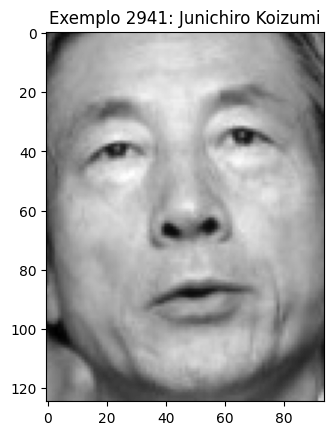


 Todos os dados estão resumidos em uma matriz de 13233 linhas por 11750 colunas.


In [3]:
cont_imagens, altura_lfw, largura_lfw = lfw_people.images.shape
n_classes = lfw_people.target_names.shape[0]

print(f'O dataset contém ',cont_imagens, 'imagens de dimensões ', altura_lfw, 'por', largura_lfw)
print(f'Portanto, o número de características (dimensão) de cada imagem é {altura_lfw}x{largura_lfw} = {lfw_people.data.shape[1]}\n')

print(f'Cada uma das imagens tem um número de identificação. Os números estão armazenados em um vetor de dimensão {lfw_people.target.shape[0]}:')
print(f'{lfw_people.target}\n' )

print(f'O número direciona a imagem a uma das {n_classes} pessoas diferentes existentes no dataset. São elas:')
target_names = lfw_people.target_names
print(f'{target_names}\n')

plt.imshow(lfw_people.images[cont_imagens-1], cmap='gray')
name_ex = lfw_people.target_names[lfw_people.target[cont_imagens-1]]

plt.title('Exemplo '+str(lfw_people.target[cont_imagens-1])+': '+str(name_ex))
plt.show()


print(f'\n Todos os dados estão resumidos em uma matriz de {lfw_people.data.shape[0]} linhas por {lfw_people.data.shape[1]} colunas.')

Junichiro Koizumi foi um político japonês que serviu como Primeiro-Ministro do Japão de 2001 a 2006. Ele é conhecido por suas políticas reformistas e estilo de liderança carismático. Koizumi nasceu em 8 de janeiro de 1942, em Yokosuka, na província de Kanagawa. Ele ingressou na política seguindo os passos de seu pai e avô, ambos políticos influentes.

In [4]:
for (i,j) in zip(range(len(target_names)),target_names):
  if j == "Roberto Carlos":
    print(i,j)
  if j == "Tony Blair":
    print(i,j)
  if j == "Halle Berry":
    print(i,j)
  if j == "Pele":
    print(i,j)
  if j == "Naomi Campbell":
    print(i,j)
  if j == "Ariel Sharon":
    print(i,j)
  if j == "Colin Powell":
    print(i,j)
  if j == "Margaret Thatcher":
    print(i,j)
  if j == "Gisele Bundchen":
    print(i,j)
  if j == "Tom Cruise":
    print(i,j)

373 Ariel Sharon
1047 Colin Powell
1918 Gisele Bundchen
2021 Halle Berry
3486 Margaret Thatcher
4010 Naomi Campbell
4314 Pele
4721 Roberto Carlos
5406 Tom Cruise
5458 Tony Blair


Veja que o dataset é composto das mais diversas faces...

<center><img src='https://drive.google.com/uc?export=view&id=1894U8zqrngytKUesDT4Uxuu_Q1SQPfqh' width="900"></center>

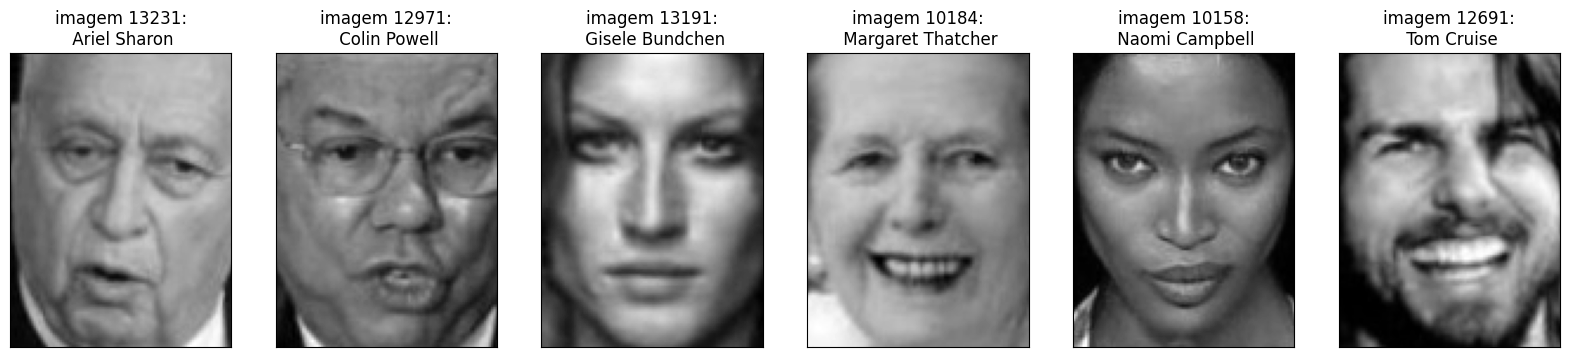

In [5]:
plt.figure(figsize=(20,120))
face_numbers = [373,1047,1918,3486,4010,5406]
for i in range(len(face_numbers)):
    plt.subplot(1,6,i+1)
    for j in range(len(lfw_people.target)):
      if lfw_people.target[j] == face_numbers[i]:
        plt.imshow(lfw_people.images[j], cmap='gray')
        plt.title('imagem '+str(j)+':\n '+str(target_names[lfw_people.target[j]]))
        plt.xticks(())
        plt.yticks(())
plt.show()

 Veja outros exemplos...

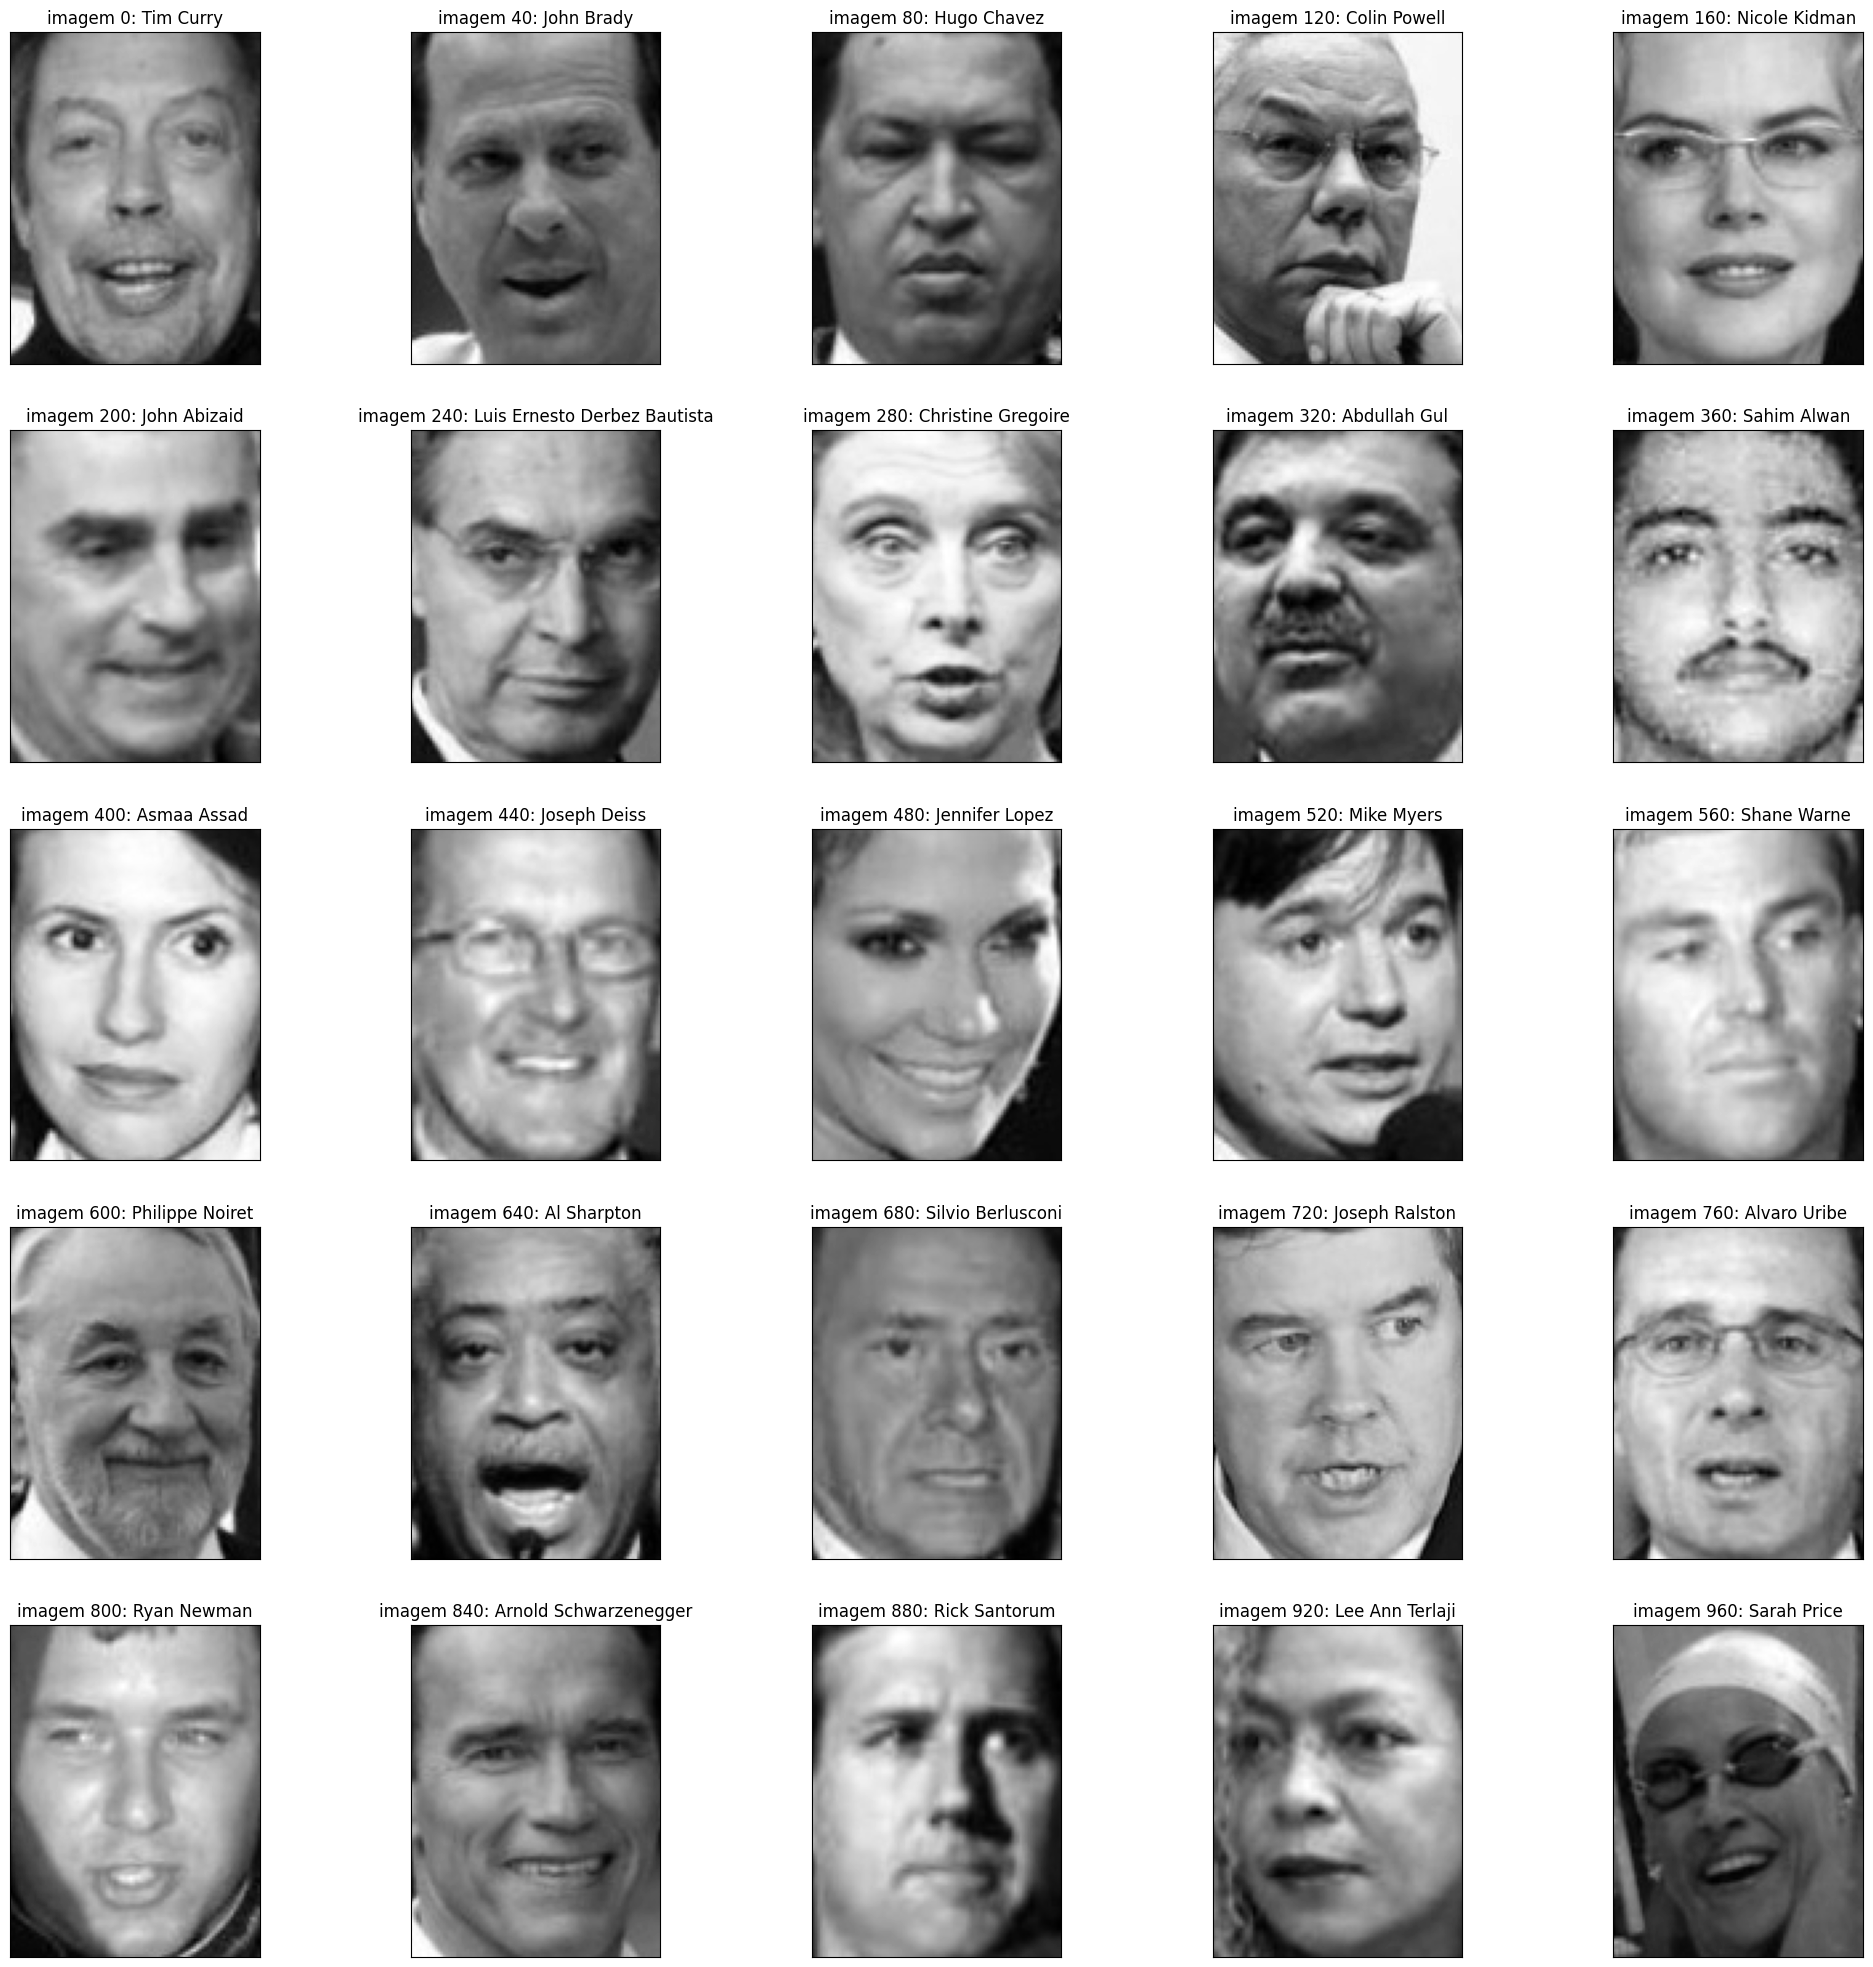

In [6]:
plt.figure(figsize=(25,25))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(lfw_people.images[i*40], cmap='gray')
    plt.title('imagem '+str(i*40)+': '+str(target_names[lfw_people.target[i*40]]))
    plt.xticks(())
    plt.yticks(())
plt.show()

# <font face="Verdana" size=6 color='#6495ED'>   PCA
Lembram-se das aulas?

## Recap sobre PCA

O objeto `PCA` da biblioteca `sklearn` faz a decomposição em componentes principais de uma amostra. O seu construtor tem a sintaxe `decomposition.PCA()`.

O parâmetro opcional `n_components` especifica a quantidade de componentes a ser obtida na decomposição. Se omitido, todos os componentes serão armazenados.

Um conjunto de dados pode ser decomposto em suas componentes principais com o método `fit(dados)` onde `dados` é uma matriz cujas linhas são pontos do espaço amostral (características = dimensão de nosso problema).

O objeto retornado possui os atributos `mean_` com o ponto médio, `components_` com uma matriz cujas *linhas* são os autovetores da matriz de covariância e `explained_variance_` que corresponde aos autovalores da matriz de covariância dos dados. Ainda, `explained_variance_ratio_` retorna a porcentagem de variação explicada por cada um dos componentes selecionados.

Ponto médio:
 [3. 4.]
Autovalores:
 [8. 0.]
Variância explicada:
 [1. 0.]
Componentes principais:
 [[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]
Dados transformados:
 [[-2.82842712e+00 -2.22044605e-16]
 [ 0.00000000e+00  0.00000000e+00]
 [ 2.82842712e+00  2.22044605e-16]]


Dados recuperados:
 [[1. 2.]
 [3. 4.]
 [5. 6.]]




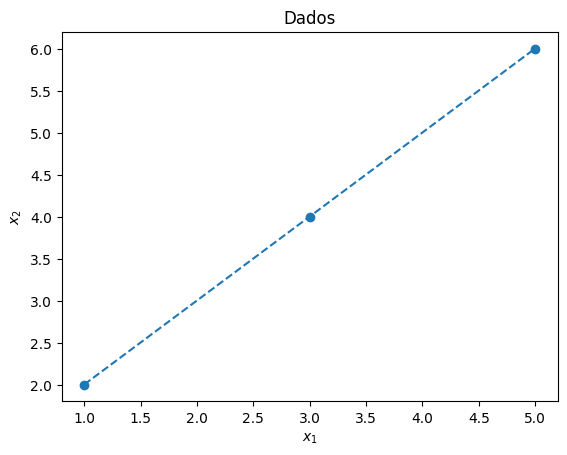

In [7]:
from sklearn.decomposition import PCA

# Cria uma matriz de dados 3 (exemplos) x 2 (características)
dados = np.array([[1, 2], [3, 4], [5, 6]])
plt.plot(dados[:,0], dados[:,1], marker = 'o', linestyle="--")
plt.title('Dados')
plt.ylabel(r'$x_2$')
plt.xlabel(r'$x_1$')

# Cria uma instância da classe PCA especificando o número de componentes:
pca = PCA(n_components=2)

# Ajusta a PCA no conjunto de dados
pca.fit(dados)

# Acessa o ponto médio
media = pca.mean_
print("Ponto médio:\n", media)

# Acessa a variância explicada através dos autovetores
autovalores = pca.explained_variance_
print("Autovalores:\n", autovalores)

# Variância explicada
print("Variância explicada:\n", pca.explained_variance_ratio_)

# Acessa os componentes principais (vetores de projeção) através dos autovetores
componentes_principais = pca.components_
print("Componentes principais:\n", componentes_principais)

# Transforma os dados originais usando a projeção PCA
dados_transformados = pca.transform(dados)
print("Dados transformados:\n", dados_transformados)
print("\n")

# Transforma os dados originais usando a projeção PCA
dados_recuperados = pca.inverse_transform(dados_transformados)
print("Dados recuperados:\n", dados_recuperados)
print("\n")


Veja que no conjunto de dados acima os pontos são perfeitamente alinhados em uma linha reta em um espaço 2D. O PCA deste conjunto de dados, portanto, produziu dois autovalores:
* Um autovalor positivo, correspondente à direção ao longo da linha (onde há variação).
* Um autovalor que é zero, correspondente à direção perpendicular à linha (onde não há variação).

<center><img src='https://drive.google.com/uc?export=view&id=19IUASr4WgNh_0mDDbDPO9-NdfMaRiN3c' width="600"></center>

Obviamente, recupera-se totalmente a matriz de dados porque foram utilizados todas as componentes principais. Troque o número de componentes e verifique que o resultado será o mesmo por causa do alinhamento dos dados.

Modifique um pouco a matriz `dados`, como por exemplo:
```
dados = np.array([[1, 2], [3, 4.8], [5, 6]])
```

para desalinhar os pontos e verifique o resultado.


# <font face="Verdana" size=6 color='#6495ED'>  Criação do dataset

Veja que os dados LFW estão resumidos em uma matriz de $13233$ linhas (número total de imagens) por $11750$ colunas (dimensão das imagens, se você usou `resize=1.0`).  As imagens têm dimensão de $125 \times 94$.

Se extrairemos o PCA deste conjunto de dados ou, como sugerido, adicionaremos as nossas imagens ao conjunto, e calcularemos PCA com todas as imagens possíveis, nosso dataset deve ter a mesma dimensão.

Então, a parte de criação do dataset é dividida em duas partes:
1. organização das imagens
2. Criação do dataset




## Organização das imagens

O código abaixo é um tutorial para correção das fotos para a dimensão correta de $125 \times 94$ centralizando o rosto. Ao final, o código ensina a salvar a foto corrigida em seu computador local.

<center><img src='https://drive.google.com/uc?export=view&id=1w0f26WVCJvau8ML3JAJvaeS5t7PBL7Br' width="1200"></center>

Ao final, quando todas suas imagens foram redimensionadas e salvas no computador local, você deve salvar em um subdiretorio no __seu__ google drive e informar a url para este subdiretório na planilha disponibilizada no [link](https://docs.google.com/spreadsheets/d/1MmfWuFmUT42y--VwyFFcf79X7lhHeT6U5XNSR7ZC_o4/edit?usp=sharing).



In [ ]:
from google.colab import files
files.upload();

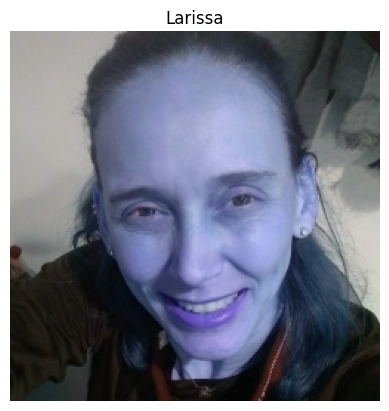

In [ ]:
name = 'Larissa_Driemeier_01.jpg'
image_org = cv2.imread(name)
plt.imshow(image_org),plt.title('Larissa'),plt.axis('off')
# Imagem em escala de cinzas
image = cv2.cvtColor(image_org,cv2.COLOR_RGB2GRAY)
image_org = cv2.cvtColor(image_org,cv2.COLOR_RGB2GRAY)
x,y = image.shape[0], image.shape[1]

A linha de código abaixo utiliza o Haar Cascade, que é um dos mais antigos e poderosos algoritmos de detecção de rosto em tempo real inventados (muito antes do Deep Learning se tornar famoso), e podemos acessá-los com métodos OpenCV. Haar Features não foram usados apenas para detectar rostos, mas também para olhos, lábios, etc. O algoritmo usa recursos de detecção de borda ou linha propostos por Viola e Jones em seu trabalho de pesquisa [Rapid Object Detection using a Boosted Cascade of Simple Features](https://ieeexplore.ieee.org/document/990517) publicado em 2001. Ambas as técnicas ainda serão aprendidas no seu curso de IA.

In [ ]:
from google.colab.patches import cv2_imshow
haar_face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))

In [ ]:
# Reconhecimento de faces
rostos = haar_face_cascade.detectMultiScale(image)
print(rostos)
print(f'{rostos.shape[0]} rosto(s) detectado(s)')
n_rostos = rostos.shape[0]

print(f'\n A matriz rostos:\n {rostos}')

[[ 44  53 164 164]]
1 rosto(s) detectado(s)

 A matriz rostos:
 [[ 44  53 164 164]]


Veja que o rosto detectado se inicia na posição `rostos[0],rostos[1]` e tem dimensão `rostos[2] x rostos[3]`.

O código abaixo posiciona um retângulo ao redor das faces reconhecidas na imagem.

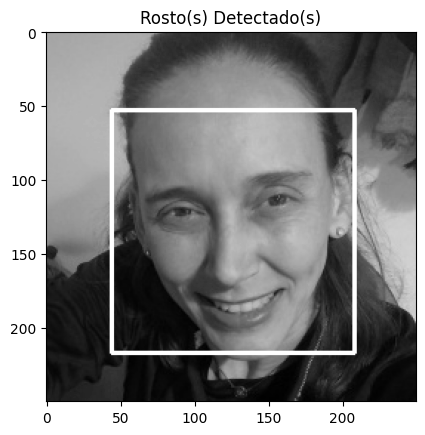

In [ ]:
# Colocando o retângulo ao redor da face reconhecida
for (x, y, largura, altura) in rostos:
  image_r = cv2.rectangle(image,(x,y),(x+largura,y+altura),(255,0,0),2)
#Plotando a imagem
plt.imshow(image_r, cmap='gray'),plt.title('Rosto(s) Detectado(s)');

Caso tenha mais de uma face, o código abaixo mostra, em zoom, todos os rostos detectados.

In [ ]:
# Zoom no rosto detectado

plt.figure(figsize=(10,10)) # especificação do tamanho total do grid
i=0
for (x, y, largura, altura) in rostos:
  i += 1
  plt.subplot(1,n_rostos,i)    # o número máximo de imagens é 5x5=25
  plt.imshow(cv2.cvtColor(image[y:y+altura, x:x+largura], cv2.COLOR_BGR2RGB))
  plt.title('imagem '+ str(i)+'   largura: '+str(largura)+'x altura:'+str(altura))
plt.show()

Se o código detectou mais de um rosto, escolha o maior. Esta imagem que deverá ser reconhecida!!!'



44 53 164 164
A imagem mostrada tem 164 pixels de largura e 164 pixels de altura.


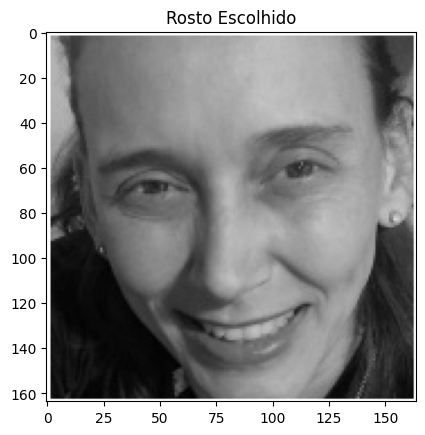

In [ ]:
#se houver vários rostos, escolha o quadro desenhado ao redor da maior imagem,
x, y, largura, altura = rostos[rostos[:,-1].argsort()[-1]] #
print(x,y,largura,altura)
plt.imshow(image[y:y+altura, x:x+largura], cmap='gray'),plt.title('Rosto Escolhido');
print(f'A imagem mostrada tem {largura} pixels de largura e {altura} pixels de altura.')

Se essa é a imagem que deve ser reconhecida, então precisamos transformá-la para nosso tamanho padrão, ié, `altura_lfw = 125` e  `largura_lfw = 94`

In [ ]:
def crop_rate(img, x,y,largura,altura, largura_lfw = 94, altura_lfw = 125, interpolation=cv2.INTER_AREA): #cv2.INTER_AREA
      razao_aspecto = altura_lfw/largura_lfw
      centro_x = x + largura/2
      centro_y = y + altura/2
      area = largura*altura
      largura_adj = np.sqrt(area/razao_aspecto)
      altura_adj = razao_aspecto*largura_adj
      x_min = int(np.floor(centro_x-largura_adj/2))
      x_max = int(np.ceil(centro_x+largura_adj/2))
      y_min = int(np.floor(centro_y-altura_adj/2 + 0.5))
      y_max = int(np.ceil(centro_y+altura_adj/2 + 0.5))
      if y_min <0:
         y_max -= y_min
         y_min = 0
      if x_min <0:
         x_max -= x_min
         x_min = 0
      # Centralize and crop
      crop_img = img[y_min:y_max, x_min:x_max]
      img_lfw = cv2.resize(crop_img, (largura_lfw, altura_lfw), interpolation=interpolation)

      print(img_lfw.shape)
      return img_lfw

(125, 94)


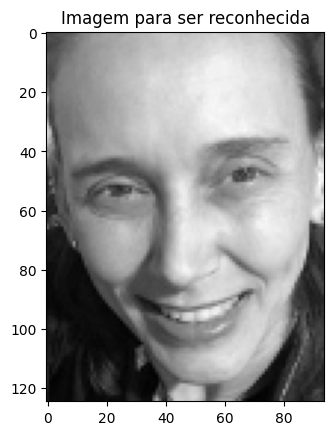

In [ ]:
image = crop_rate(image_org,x=x,y=y,largura=largura,altura=altura)#,largura_lfw =largura, altura_lfw = altura)
plt.imshow(image, cmap='gray'),plt.title('Imagem para ser reconhecida');

As suas imagens devem ser salvas em um diretorio com seu nome utilzando o link abaixo:

In [ ]:
#Salve a imagem em um arquivo
cv2.imwrite('Larissa_Driemeier_01_b.jpg', image)

# Agora você pode baixar o arquivo salvo
files.download('Larissa_Driemeier_01_b.jpg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Vocês podem fazer um código para seguir os passos mostrados em um loop sobre todas as imagens.

## Dataset

O tutorial abaixo permite que vocês o dataset com as fotos dos colegas. Para isto, as etapas são:
* download download da planila `ThisIsMe.csv` do google drive, onde todos seus colegas e você compartilharam as fotos - [link](https://docs.google.com/spreadsheets/d/1MmfWuFmUT42y--VwyFFcf79X7lhHeT6U5XNSR7ZC_o4/edit?usp=sharing).
* upload da planilha aqui
* geração dos seguintes conjuntos de dados:
  * `turma_data` (dataset com entradas) matriz de dimensão $total \text{ }de\text{ } fotos \times 11750$, isto é, cada linha é uma foto e cada coluna um pixel da foto.
  * `turma_target` (dataset com saídas) vetor com dimensão $total\text{ } de \text{ }fotos \times 1$. Cada linha $i$ corresponde ao ID da pessoa que aparece na foto da linha $i$ do conjunto `turma_data`
  *  `turma_target_names` é um vetor com dimensão $total\text{ } de\text{ } colegas \times 1$. Cada linha $j$ corresponde ao nome da pessoa com o ID $j$.

  <center><img src='https://drive.google.com/uc?export=view&id=1J2jwPqWP3G7ipsFxldfGVbcl_R4OQLAo' width="900"></center>


Faça download da planila `ThisIsMe.csv` do google drive, onde todos seus colegas e você compartilharam as fotos, e faça upload aqui.

In [11]:
from google.colab import files
files.upload();

Saving ThisIsMe_Y2024.csv to ThisIsMe_Y2024.csv


In [12]:
df_ThisIsMe = pd.read_csv('ThisIsMe_Y2024.csv')
print(df_ThisIsMe)

    id                             Nome  \
0    0                Larissa Driemeier   
1    1                Anderson Schinaid   
2    2                 Leonardo Tumonis   
3    3                      Vitor Ozols   
4    4         Luiz Claudio Dias Mendes   
5    5          Gláucio Soares da Silva   
6    6                     Simone Brito   
7    7                  Macmore Maziero   
8    8                  Gustavo G Rigor   
9    9                  Guilherme Sousa   
10  10                    Isaac Barella   
11  11               Cristtiane Moreira   
12  12                 Gabriel Torrezan   
13  13            Thais dos Santos Lino   
14  14                   Carlos Curioni   
15  15              Rafael Costa Mendes   
16  16                Sergio H Teixeira   
17  17                  Clarissa Mattos   
18  18                    Gabriel Agune   
19  19          Higor Freire da Fonseca   
20  20                 Flavio Vicentini   
21  21                      Emily Costa   
22  22     

In [20]:
import gdown

diretorios = []

for idx, competidor in df_ThisIsMe[6:].iterrows():
  nome = competidor["Nome"]
  url = competidor["url"]
  # Cria subdiretorio
  out = "ThisIsMe/" + nome
  print(out)
  gdown.download_folder(url, output=out)
  diretorios.append(out)

ThisIsMe/Simone Brito


Retrieving folder contents


Processing file 1gjR2st7LsLPVDyoQJqdrtTE3sUXM76iB FotoSimone.jpg
Processing file 1X4w1PAT_H1oAtMGaAaTuOgAYhkzdF6ql FotoSimone2.jpg
Processing file 1XpGp9myaar78bmZrXFXwqPXt0rayZhQ9 FotoSimone3.jpg
Processing file 1ldtm7e7AZUu_k45Ce1MG8HoOxHLuFgXC FotoSimone4.jpg
Processing file 11MepFGeWHJ1fzos_In2DRiZriEKkXqQ3 FotoSimone5.jpg
Processing file 13OvulJtk5D8S6yEYOkVlb91ejZDD5Lnz FotoSimone6.jpg
Processing file 1CItdvs0O3BD6TN7dlJI15lEJPnrDh-RH FotoSimone7.jpg
Processing file 1VkVxgqz276p25u6t-RGp4IU5aA057DwS FotoSimone8.jpg
Processing file 1KnmDmCJZ4PEhJJ92q43e-EaeWO9XBw70 FotoSimone9.jpg
Processing file 1d2KuaR2C0fB_iMS9CSyHK9-bSwj-ULFY FotoSimone10.jpg


Retrieving folder contents completed
Building directory structure
Building directory structure completed


FileURLRetrievalError: Failed to retrieve file url:

	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses.
	Check FAQ in https://github.com/wkentaro/gdown?tab=readme-ov-file#faq.

You may still be able to access the file from the browser:

	https://drive.google.com/uc?id=1gjR2st7LsLPVDyoQJqdrtTE3sUXM76iB

but Gdown can't. Please check connections and permissions.

In [23]:
diretorios

[]

In [22]:
turma_target_names = os.listdir('/content/drive/MyDrive/FotosPosIA')
print(turma_target_names)

['Higor Freire da Fonseca', 'Gláucio Soares da Silva', 'Joao Paulo Mota', 'Guilherme Sousa', 'Guilherme Vick', 'Hiero de Paula', 'Gustavo Gomes', 'Isaac Barella', 'Gustavo G Rigor', 'Icaro Figaro', 'Macmore Maziero', 'Matias Herklotz', 'Lina Yoshida', 'Natalia Godoy', 'Pedro Nunes Guth', 'Jorge Filho', 'Pedro Moraes', 'Leonardo Tumonis', 'José Patino', 'Luiz Claudio Dias Mendes', 'Alexandre Araujo', 'Simone Brito', 'Rodrigo Florencio', 'Vitor Ozols', 'Sergio H Teixeira', 'Thais dos Santos Lino', 'Anderson Schinaid', 'Ricardo Sahara', 'Wallace Galvao', 'Rafael Costa Mendes', 'Cassio Serrano', 'Elido Gonzalez', 'Andre Teixeira', 'Deborah Godoi', 'Clarissa Mattos', 'Cristtiane Moreira', 'Carlos Curioni', 'Eduardo Matos', 'Emily Costa', 'Eduardo Marques', 'Felipe Amorim', 'Fernando Tamayose', 'Gabriel Torrezan', 'Flavio Vicentini', 'Gabriel Mancini', 'Gabriel Agune']


In [24]:
#turma_target_names.remove('.ipynb_checkpoints')
n_classes = len(turma_target_names)
print(f'Nosso problema terá {n_classes} classes.')

Nosso problema terá 46 classes.


In [30]:
basedir = '/content/drive/MyDrive/FotosPosIA/'

In [28]:
os.listdir('/content/drive/MyDrive/FotosPosIA/Gabriel Mancini/')

['Gabriel_Mancini_1.jpg',
 'Gabriel_Mancini_2.jpg',
 'Gabriel_Mancini_3.jpg',
 'Gabriel_Mancini_4.jpg',
 'Gabriel_Mancini_5.jpg',
 'Gabriel_Mancini_6.jpg',
 'Gabriel_Mancini_7.jpg',
 'Gabriel_Mancini_8.jpg',
 'Gabriel_Mancini_9.jpg',
 'Gabriel_Mancini_10.jpg']

In [31]:
altura_ofw = altura_lfw
largura_ofw = largura_lfw
turma_data = []
turma_target = []
for i in range(len(turma_target_names)):
  included_extensions = ['jpg','jpeg']
  imagens = [fn for fn in os.listdir(basedir+turma_target_names[i]+'/')
              if any(fn.endswith(ext) for ext in included_extensions)]
  for j in range(len(imagens)):
    img = cv2.imread('{0}/{1}/{2}'.format(basedir,turma_target_names[i],imagens[j]), cv2.IMREAD_GRAYSCALE)
    turma_data.append(img.reshape(1,-1)[0])
    turma_target.append(i)

Os dados de entrada são `turma_data` com número de linhas coincidente com número total de imagens por 11750 colunas (cada coluna uma característica da imagem). Os dados de saída estão armazenados no dataset `turma_target`, que tem dimensão número total de imagens, cada linha é um número inteiro que pode variar entre 0 - `tamanho da turma` (cada número representa um nome).


In [32]:
turma_data = np.array(turma_data)
turma_target = np.array(turma_target)
print(turma_data.shape)
print(turma_target.shape)

(455, 11750)
(455,)


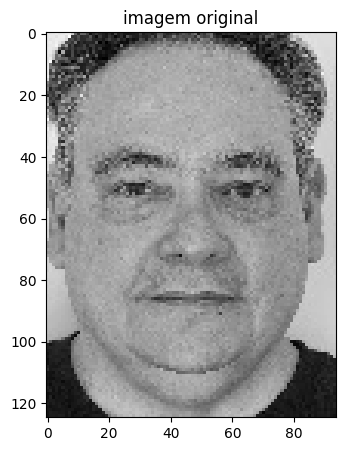

In [33]:
plt.figure(figsize=(5,5))
plt.imshow(turma_data[0].reshape(altura_lfw, largura_lfw), cmap='gray')
plt.title('imagem original')
plt.show()

In [34]:
print(turma_target, turma_target_names)

[ 0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  2  2  2  2
  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4
  4  4  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  7  7
  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9
  9  9  9  9 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11
 12 12 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 13 13 14 14 14 14
 14 14 14 14 14 14 15 15 15 15 15 15 15 15 15 15 16 16 16 16 16 16 16 16
 16 16 17 17 17 17 17 17 17 17 17 17 18 18 18 18 18 18 18 18 18 18 19 19
 19 19 19 19 19 19 19 19 20 20 20 20 20 20 20 20 20 20 21 21 21 21 21 21
 21 21 21 21 22 22 22 22 22 22 22 22 22 22 23 23 23 23 23 23 23 23 23 23
 24 24 24 24 24 24 24 24 24 24 25 25 25 25 25 25 25 25 25 25 26 26 26 26
 26 26 26 26 26 26 26 26 27 27 27 27 27 27 27 27 27 27 28 28 28 28 28 28
 28 28 28 28 29 29 29 29 29 29 29 29 29 29 30 30 30 30 30 31 31 31 31 31
 31 31 31 31 31 32 32 32 32 32 32 32 32 32 32 33 33

Monte o google drive para garantir persistência dos dados depois que você encerrar o Notebook.

O módulo `pickle` do Python é usado para *serializar* e *desserializar* a estrutura de qualquer objeto Python (lista, dicionário, ...).  *Serialização* é o processo de converter um objeto em um formato que pode ser facilmente salvo em disco ou transmitido pela rede. No caso do `pickle`, esse formato é um fluxo de bytes (caracteres). A ideia é que esse fluxo de caracteres contém todas as informações necessárias para reconstruir (ou *unpickle*) o objeto em outro script Python.

In [40]:
import pickle as pk
import os

In [41]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [37]:
# Construa o caminho completo do arquivo
file_path = '/content/gdrive/MyDrive/AprendizadoMaquinasI/2024/ThisIsMe/Dataset/'

# Verifique se o diretório existe, se não, crie-o
dir_path = os.path.dirname(file_path)
if not os.path.exists(dir_path):
    os.makedirs(dir_path)

# Salve os arquivos
with open(file_path+'turma_data.pkl', 'wb') as pickle_file:
    pk.dump(turma_data, pickle_file)

with open(file_path+'turma_target.pkl', 'wb') as pickle_file:
    pk.dump(turma_target, pickle_file)

with open(file_path+'turma_target_names.pkl', 'wb') as pickle_file:
    pk.dump(turma_target_names, pickle_file)

# <font face="Verdana" size=6 color='#6495ED'> Sua lição

Seria interessante aplicar PCA para reduzir a dimensão dos pontos de `lfw_people.data` a uma dimensão de `n_PC` componentes retendo-se o *máximo* de informação possível. Verifique, através da plotagem da porcentagem de variação explicada acumulada, qual o valor razoável para `n_PC`. Para encontrar as direções principais, passe o parâmetro `n_components=n_PC` no construtor de `PCA` e crie uma nova decomposição de `lfw_people.data` com o método `fit`.

Depois, os dados projetados no novo espaço de dimensão reduzida são obtidos a partir de pontos no espaço original com o método `transform` (naturalmente aqui há alguma perda de informação).

Para você e seu grupo:

1. Criem o dataset:
 * `data_images` com as imagens da turma adicionadas ao `lfw_people.images`
 * `data` com os dados adicionados à lista `lfw_people.data`
 * `data_target`, acrescente mais números em `lfw_people.target`
 * `data_names`, acrescente os nomes em `lfw_people.target_names`
2. Calculem o PCA;
3. Plotem o gráfico da variância explicada acumulada e, baseando-se no gráfico, escolham um número de componentes principais a ser adotado;
4. Plotem o *rosto médio*. Uma parte interessante do PCA é que ele calcula o *rosto médio*, que pode ser interessante examinar. Isso pode ser calculado com `pca.mean_`. Este rosto mostrará a média para cada dimensão de todas as imagens no conjunto de dados. Portanto, ele efetivamente mostra um rosto MÉDIO refletindo todos os rostos no conjunto de dados.
5. Projetem o  __i-ésimo ponto__ `lfw_people.data[i]` (lembrem-se que os valores devem estar na forma de vetor linha e, portanto, dimensão de $1 \times 11750$ ) nas CPs e os projetem novamente no espaço original. Usem diferentes quantidades de componentes principais `n_PC` e vejam o quanto de informação é perdida para um baixo número de componentes consideradas. Verifiquem também, que a medida que o número de componentes consideradas cresce, a imagem recuperada se aproxima da imagem original. Um ponto do espaço original recuperado pode ser obtido a partir do espaço reduzido com o método `inverse_transform`.
6. Apenas para ilustração, remodelem as componentes principais e definam como `eigenfaces`, que é o nome dado a um conjunto de autovetores quando usado no problema de visão computacional de reconhecimento de rosto humano. Vejam que quando PCA é aplicado a dimensão de cada uma das `n_PC` componentes é de 11750 e, para mostrar a imagem,  devem remodelar o vetor para dimensão de `altura_lfw` ($125$) vs `largura_lfw` ($94$):

`eigenfaces = pca.components_.reshape((n_PC, altura_lfw, largura_lfw))`

7. Plotem as primeiras (20, por exemplo) eigenfaces e resumam suas conclusões.
8. É interessante notar que o espaço das eigenfaces não é útil apenas para representar rostos humanos, mas também pode ser usado para aproximar um cachorro (Fig. `doguito.png`) ou um cappuccino (Fig. `capuccino.png`). Vocês devem testar. Isso é possível porque as 1600 eigenfaces abrangem um grande subespaço do espaço de imagem de 32256 dimensões, correspondendo a características espaciais amplas, suaves e não localizadas, como bochechas, testa, bocas, etc.
9. Salvem os dados do PCA.

In [142]:
file_path = '/content/gdrive/MyDrive/AprendizadoMaquinasI/2024/ThisIsMe/Dataset/'

with open(file_path+'turma_data.pkl', 'rb') as arquivo:
    # Carregar o objeto do arquivo pickle
    turma_data = pk.load(arquivo)

with open(file_path+'turma_target.pkl', 'rb') as arquivo:
    # Carregar o objeto do arquivo pickle
    turma_target = pk.load(arquivo)

with open(file_path+'turma_target_names.pkl', 'rb') as arquivo:
    # Carregar o objeto do arquivo pickle
    turma_target_names = pk.load(arquivo)

turma_images = turma_data.reshape(len(turma_data), altura_lfw, largura_lfw)

In [143]:
turma_data = turma_data.astype('float32')

for i in range(len(turma_data)):
  turma_data[i] = np.array(list(map(lambda x: x/256, turma_data[i])))

In [145]:
data_images = np.vstack((lfw_people.images, turma_images))
data = np.vstack((lfw_people.data, turma_data))
data_target = np.append(lfw_people.target, turma_target)
data_names = np.append(lfw_people.target_names, turma_target_names)

In [146]:
from sklearn.decomposition import PCA

n_PC = 500

pca = PCA(n_components = n_PC)
pca.fit(data)

# print(i)
# Variância explicada cumulativa
cumulative_variance_explained = np.cumsum(pca.explained_variance_ratio_)

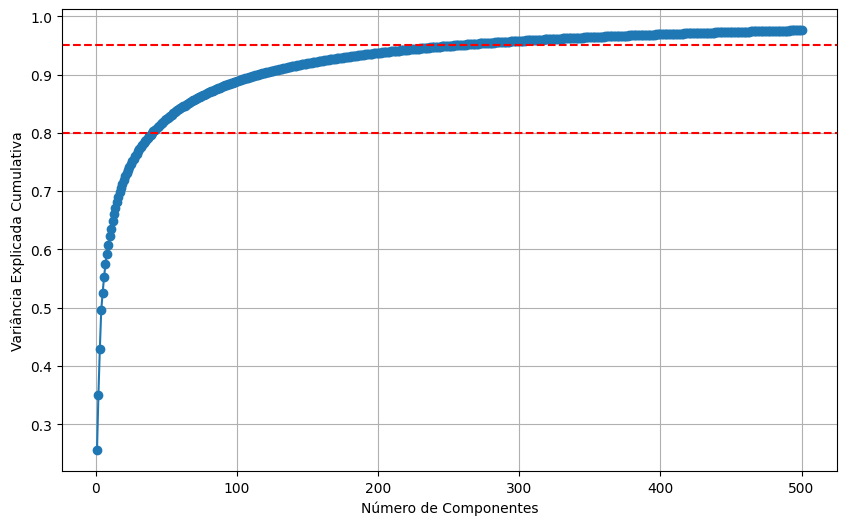

Quantidade de PCs que explicam 80% da variância: 41
Quantidade de PCs que explicam 95% da variância: 255


In [147]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_PC + 1), cumulative_variance_explained, marker='o')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variância Explicada')
plt.axhline(y=0.8, color='r', linestyle='--', label='80% Variância Explicada')
plt.xlabel('Número de Componentes')
plt.ylabel('Variância Explicada Cumulativa')
plt.grid(True)
plt.show()

qtd_pcs_80 = len(cumulative_variance_explained[cumulative_variance_explained < 0.8])
qtd_pcs_95 = len(cumulative_variance_explained[cumulative_variance_explained < 0.95])

print(f'Quantidade de PCs que explicam 80% da variância: {qtd_pcs_80+1}')
print(f'Quantidade de PCs que explicam 95% da variância: {qtd_pcs_95+1}')

In [154]:
n_PC = 41
pca = PCA(n_components = n_PC)
pca.fit(data)

PCA(n_components=41)

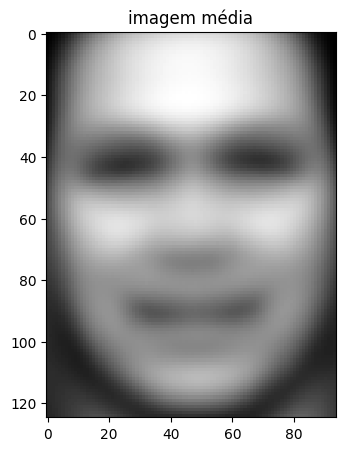

In [155]:
plt.figure(figsize=(5,5))
plt.imshow(pca.mean_.reshape(altura_lfw, largura_lfw), cmap='gray')
plt.title('imagem média')
plt.show()

# <font face="Verdana" size=6 color='#6495ED'> DESAFIO




## Treinamento do Modelo SVM

Você vai criar um classificador por vetores de suporte (*Support Vector Machine* - SVM).

São várias etapas:
* O seu PCA está bom? Você explorou todas as possibilidades?
* Use o dataset de entradas (`turma_data`, imagens) e saídas (`turma_target`, números de 0 ao total de colegas). Além disso, você precisa da lista `turma_target_names`, para depois ligar os nomes aos números de classificação;
* Divida seus dados em treino e teste. Verifique se alguns colegas, que possuem poucas fotos, não ficaram somente em um grupo;
* Treine o modelo SVM, utilizando o `GridSearchCV` para ajuste de hiperperâmetros;
* Analise a performance do modelo, plotando, por exemplo, a matriz de confusão.

Ao final da próxima aula, você receberá um notebook onde poderá carregar seu pca:
```
pca = pk.load(open(file_path_pcs+'pca.pkl', 'rb'))
```
e seu modelo será treinado na hora, com o dataset de seus colegas.

A imagem de um colega será capturada pela câmera de seu computador, a face deverá ser identificada via Haar Cascade e, finalmente, você irá utilizar seu algoritmo para reconhecer quem é o colega.
```
def tirar_foto(quality=0.8, texto_botao="Capturar"):
  js = Javascript('''
    async function takePhoto(qual, texto) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = texto;
      div.appendChild(capture);

      // Abre a câmera
      const stream = await navigator.mediaDevices.getUserMedia({video: true});
      // Mostra a saída da câmera
      const video = document.createElement('video');
      video.style.display = 'block';
      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;      
      await video.play();
      
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', qual);
    }
    ''')
  display(js)
  return eval_js('takePhoto({}, "{}")'.format(quality, texto_botao))

try:
  imagem_urlb64 = tirar_foto()
  imbytes = b64decode(imagem_urlb64.split(',')[1])
  im = cv2.imdecode(np.frombuffer(imbytes, dtype=np.uint8), flags=1)
  plt.imshow(im, cmap='gray'),plt.title('Imagem capturada')
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))
```

<font face="Verdana" size=3 color='#40E0D0'>  O melhor time receberá um prêmio.